## Naive Bayes | Full Case-Study (Email Filtering)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#### Import Dataset & Extracting Features

In [2]:
emails = pd.read_csv(r'G:\Udemy Courses Files\Python Machine Learning Diploma\5-Supervised classification\datasets\emails.csv')
emails

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


#### Exploring Data

<Axes: xlabel='spam', ylabel='count'>

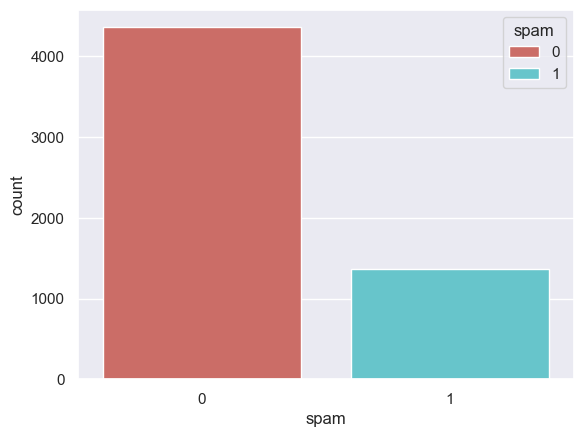

In [3]:
sns.countplot(x='spam', data=emails, palette='hls', hue='spam' ,legend=True)

-------------------


#### Vectorization Example (Converting text to Numeric data)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert a collection of text documents to a matrix of token counts

In [5]:
my_text = ['I am good', 'I feel good', 'You are good', 'So far', 'so good']

In [6]:
cv = CountVectorizer()

In [7]:
cv.fit_transform(my_text).toarray()


array([[1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0]], dtype=int64)

In [8]:
cv.get_feature_names_out()

array(['am', 'are', 'far', 'feel', 'good', 'so', 'you'], dtype=object)

-------------------


#### Data Splitting & Preprocessing

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vectorizer = CountVectorizer()

In [11]:
emails['text']

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5728, dtype: object

In [12]:
emails_Vectorized = vectorizer.fit_transform(emails['text'])
emails_Vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
X = emails_Vectorized.toarray()
y = emails['spam']

#### Model Training and Prediction

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
x_test

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
from sklearn.naive_bayes import MultinomialNB

# The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification)

In [16]:
clf = MultinomialNB()

In [20]:
y_pred = clf.fit(x_train, y_train).predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [24]:
y_test.values

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

#### Model Evaluation

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('accurate score: ', accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

accurate score:  0.9883659439450027


array([[1382,   16],
       [   6,  487]], dtype=int64)

=> The model has accurate score: 98.8% of predicting which text is a spam and which is a ham (text will go to the inbox)

##### **Thank You**